In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas  as pd


# 1. 데이터 준비
col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

# csv 파일에서 DataFrame을 생성
dataset = pd.read_csv('c:\\data\\iris2.csv', encoding='UTF-8', header=None, names=col_names)
print(dataset)



     sepal-length  sepal-width  petal-length  petal-width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [2]:
# DataFrame 확인
print(dataset.shape) # (row개수, column개수)
print(dataset.info()) # 데이터 타입, row 개수, column 개수, 컬럼 데이터 타입
print(dataset.describe()) # 요약 통계 정보

print(dataset.iloc[0:5]) # dataset.head()
print(dataset.iloc[-5:]) # dataset.tail()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000   

In [3]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = dataset.iloc[:,:-1].to_numpy() # DataFrame을 np.ndarray로 변환
print(X)

# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
# y = 전체 행, 마지막 열 데이터
y = dataset.iloc[:, 4].to_numpy()
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
from sklearn.preprocessing import StandardScaler

# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화)
# Z-score 표준화: 평균을 0, 표준편차 1로 변환
scaler = StandardScaler() # Scaler 객체 생성
#scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X = scaler.fit(X).transform(X) # 스케일링(표준화 수행)

In [5]:
# 데이터 분리 
from sklearn.model_selection import train_test_split

# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)
print(len(X_train), len(X_test))

print(X_train[:3])
print(y_train[:3])

120 30
[[ 0.91683689 -0.35636057  0.47843012  0.13322594]
 [ 0.4321654  -0.35636057  0.30783301  0.13322594]
 [ 1.64384411 -0.1249576   1.16081857  0.52764485]]
['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica']


In [8]:
# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
    
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')    

평균 = 0.03231143211830658, 표준편차= 1.0154031412483953
평균 = 0.03316775833559367, 표준편차= 0.9943972353619907
평균 = 0.013079111917528315, 표준편차= 1.010679798690753
평균 = 0.02476074268698191, 표준편차= 1.016355293219859
평균 = -0.1292457284732285, 표준편차= 0.9246325054100397
평균 = -0.13267103334237781, 표준편차= 1.011283614698444
평균 = -0.05231644767011185, 표준편차= 0.9542977075853483
평균 = -0.09904297074792832, 표준편차= 0.9251085256377652


In [9]:
# 4. 학습/예측(Training/Pradiction)
from sklearn.naive_bayes import GaussianNB

#model = BernoulliNB() # Gaussian Naive Bayes 모델 선택 - 이산형 자료

model = GaussianNB() # BernoulliNB Naive Bayes 모델 선택 - 이산형 자료

model.fit( X_train, y_train )


GaussianNB()

In [10]:
# 예측
y_pred= model.predict(X_test)
print(y_pred)


['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


In [11]:
#5. 모델 평가
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [12]:
# 대각선에 있는 숫자가 정답을 맞춘 것, 그 외가 틀린 것

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
# 이원 교차표 보는 코드 
from sklearn import metrics
naive_matrix = metrics.confusion_matrix(y_test,y_pred)
print(naive_matrix)

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [14]:

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)


1.0


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


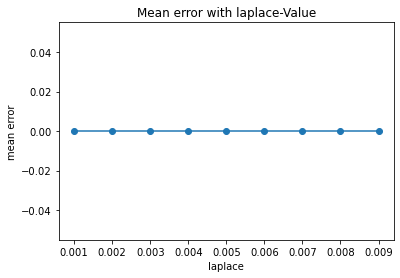

In [15]:
import numpy as np
    
# 6. 모델 개선 - laplace 값을 변화시킬 때, 에러가 줄어드는 지
errors = []
for i in   np.arange(0.001, 0.01, 0.001):
    model = GaussianNB(var_smoothing= i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

# 여기서 에러가 가장 적은 것을 선택

import matplotlib.pyplot as plt

plt.plot( np.arange(0.001, 0.01, 0.001), errors, marker='o')
plt.title('Mean error with laplace-Value')
plt.xlabel('laplace')
plt.ylabel('mean error')
plt.show()